# Analysis of 2-pt results

Data file __pion_gamma15_p0_t0_1.txt__:
* The ﬁrst column: conﬁguration number $i$
* The seventh column: time separation $t$
* The eighth column: 2-pt results $C_i(t)$

Analyze the effective mass $m_i(t)=a_0ln\frac{C_i(t)}{C_i(t+1)}$, where $a_0=0.197/0.12$.

In [1]:
using Statistics
using CSV
using DataFrames
using Plots

In [2]:
dt = DataFrame(CSV.File("pion_gamma15_p0_t0_1.txt"; header=false, delim=' ', ignorerepeated=true));
first(dt, 5)

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9
,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Float64,Float64
1,1005,0,0,0,100001515,505050,0,0.95366,0.0
2,1005,0,0,0,100001515,505050,1,0.09861,0.0
3,1005,0,0,0,100001515,505050,2,0.03787,0.0
4,1005,0,0,0,100001515,505050,3,0.02357,0.0
5,1005,0,0,0,100001515,505050,4,0.01742,0.0


In [3]:
m = 0.197/0.12*log.(dt[1:end-1, 8]./dt[2:end, 8])
deleterows!(dt, size(dt, 1))
data = hcat(dt, DataFrame(Column10=m))
i = 0
temp = groupby(data, :Column1)
index = []
for g in temp
    i += size(g, 1)
    if i != size(data, 1)
        index = [index..., i]
    end
end
deleterows!(data, index)
groupData = groupby(data, :Column7);

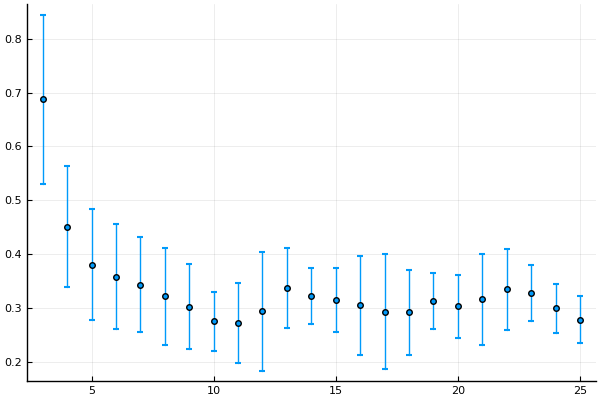

In [18]:
Mean = [mean(g.Column10) for g in groupData]
Std = [std(g.Column10) for g in groupData]
pyplot()
plot(3:25, Mean[3:25], yerr=Std[3:25], seriestype = :scatter, label=false)